In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SameerBramhecha/LP-5/master/DL/goog1.csv")

In [3]:
df.head()


,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


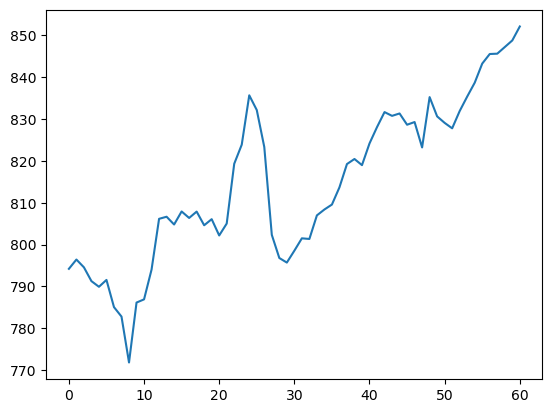

In [4]:
plt.plot(df['Close'])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
# df_normalized

In [9]:
training_size = int(len(df_normalized)*0.8)
print(training_size)
train_data, test_data = df_normalized[:training_size, :], df_normalized[training_size:,:]

48


In [11]:
def create_dataset(data, step = 4):
    x = []
    y = []
    for i in range(len(data)-step):
        x.append(data[i:i+step,0])
        y.append(data[i+step, 0])
    return np.array(x), np.array(y)
xtrain, ytrain = create_dataset(train_data)
xtest, ytest = create_dataset(test_data)
print(xtrain)
print(ytrain)

[[0.27870496 0.30635093 0.28318798 0.24209223]
 [0.30635093 0.28318798 0.24209223 0.22527981]
 [0.28318798 0.24209223 0.22527981 0.24570341]
 [0.24209223 0.22527981 0.24570341 0.16475695]
 [0.22527981 0.24570341 0.16475695 0.13661236]
 [0.24570341 0.16475695 0.13661236 0.        ]
 [0.16475695 0.13661236 0.         0.17833138]
 [0.13661236 0.         0.17833138 0.18779601]
 [0.         0.17833138 0.18779601 0.27646347]
 [0.17833138 0.18779601 0.27646347 0.42752207]
 [0.18779601 0.27646347 0.42752207 0.43374872]
 [0.27646347 0.42752207 0.43374872 0.41058501]
 [0.42752207 0.43374872 0.41058501 0.44943925]
 [0.43374872 0.41058501 0.44943925 0.43013678]
 [0.41058501 0.44943925 0.43013678 0.44906604]
 [0.44943925 0.43013678 0.44906604 0.4083435 ]
 [0.43013678 0.44906604 0.4083435  0.42652559]
 [0.44906604 0.4083435  0.42652559 0.37801975]
 [0.4083435  0.42652559 0.37801975 0.41344979]
 [0.42652559 0.37801975 0.41344979 0.5914072 ]
 [0.37801975 0.41344979 0.5914072  0.64819422]
 [0.41344979 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse'])
model.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50
2/2 [==============================] - 2s 10ms/step - loss: 0.2597 - mae: 0.4711 - mse: 0.2597
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2273 - mae: 0.4384 - mse: 0.2273
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1976 - mae: 0.4062 - mse: 0.1976
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1674 - mae: 0.3706 - mse: 0.1674
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1387 - mae: 0.3324 - mse: 0.1387
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1105 - mae: 0.2908 - mse: 0.1105
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0825 - mae: 0.2459 - mse: 0.0825
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0581 - mae: 0.2016 - mse: 0.0581
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0382 - mae: 0.1667 - mse: 0.0382
Epoch 10/50
2/2 [==============================] - 0s 

In [16]:
model.evaluate(xtest, ytest)

1/1 [==============================] - 1s 501ms/step - loss: 0.0310 - mae: 0.1715 - mse: 0.0310


[0.030967682600021362, 0.17146223783493042, 0.030967682600021362]

In [17]:
ypred = scaler.inverse_transform(model.predict(xtest))
ytest = scaler.inverse_transform(np.array(ytest).reshape(-1, 1))

1/1 [==============================] - 1s 599ms/step


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  13.768405412326388
MSE:  199.68198188472843
RMSE:  14.130887512280623


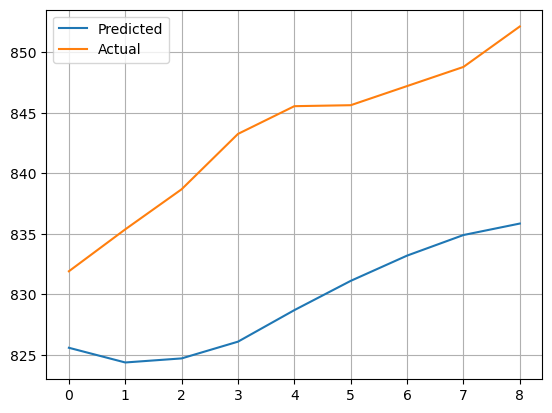

In [23]:
plt.plot(ypred, label = "Predicted")
plt.plot(ytest, label = "Actual")
plt.legend()
plt.grid()